In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor , DecisionTreeClassifier

plt.rcParams['figure.figsize'] = (10 , 5)
plt.rcParams['figure.dpi']=500

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


# Q1→→→Ans→→→Company_Dataset

In [2]:
com = pd.read_csv(r"C:\Users\mange\OneDrive\Documents\DS\Assignmnet_Material\14_Decision_Tree\Company_Data.csv")
com

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     Education Urban   US  
0           17   Yes  Yes  
1           10   Yes  Yes  
2           12   Yes  Yes  
3           14   Yes  Yes  
4           13   Yes   No  
..         ...   ...  ...  
395         14   Yes  Yes  
396         11    No  Yes  
397         18   Yes  Yes  
398         12   Yes  Yes  
399         16   Yes  Yes  

[400 rows x 11 columns]

In [3]:
com.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [4]:
com.describe()

Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.650364  147.376436   
min      0.000000   77.000000   21.000000     0.000000   10.000000   
25%      5.390000  115.000000   42.750000     0.000000  139.000000   
50%      7.490000  125.000000   69.000000     5.000000  272.000000   
75%      9.320000  135.000000   91.000000    12.000000  398.500000   
max     16.270000  175.000000  120.000000    29.000000  509.000000   

            Price         Age   Education  
count  400.000000  400.000000  400.000000  
mean   115.795000   53.322500   13.900000  
std     23.676664   16.200297    2.620528  
min     24.000000   25.000000   10.000000  
25%    100.000000   39.750000   12.000000  
50%    117.000000   54.500000   14.000000  
75%    131.000000   66.000000   16.000000  
max    191.000000   80.000000   18.000000

In [5]:
com['Sales'] = np.where(com['Sales'] >= 5 , 'yes' , 'no')
com

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     yes        138      73           11         276    120       Bad   42   
1     yes        111      48           16         260     83      Good   65   
2     yes        113      35           10         269     80    Medium   59   
3     yes        117     100            4         466     97    Medium   55   
4      no        141      64            3         340    128       Bad   38   
..    ...        ...     ...          ...         ...    ...       ...  ...   
395   yes        138     108           17         203    128      Good   33   
396   yes        139      23            3          37    120    Medium   55   
397   yes        162      26           12         368    159    Medium   40   
398   yes        100      79            7         284     95       Bad   50   
399   yes        134      37            0          27    120      Good   49   

     Education Urban   US  
0           17   Yes  Yes  
1           10   Yes  Yes  
2           12   Yes  Yes  
3           14   Yes  Yes  
4           13   Yes   No  
..         ...   ...  ...  
395         14   Yes  Yes  
396         11    No  Yes  
397         18   Yes  Yes  
398         12   Yes  Yes  
399         16   Yes  Yes  

[400 rows x 11 columns]

In [6]:
lb = LabelEncoder()

In [52]:
def encoding(dataframe , *columns):
    for column in columns:
         dataframe[column] = lb.fit_transform(dataframe[column])

In [8]:
encoding(com , 'Sales' , 'ShelveLoc' , 'Urban' , 'US')

In [9]:
com

Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0        1        138      73           11         276    120          0   42   
1        1        111      48           16         260     83          1   65   
2        1        113      35           10         269     80          2   59   
3        1        117     100            4         466     97          2   55   
4        0        141      64            3         340    128          0   38   
..     ...        ...     ...          ...         ...    ...        ...  ...   
395      1        138     108           17         203    128          1   33   
396      1        139      23            3          37    120          2   55   
397      1        162      26           12         368    159          2   40   
398      1        100      79            7         284     95          0   50   
399      1        134      37            0          27    120          1   49   

     Education  Urban  US  
0           17      1   1  
1           10      1   1  
2           12      1   1  
3           14      1   1  
4           13      1   0  
..         ...    ...  ..  
395         14      1   1  
396         11      0   1  
397         18      1   1  
398         12      1   1  
399         16      1   1  

[400 rows x 11 columns]

- splitting the data for training and testing

In [10]:
x = com.iloc[: , 1:]
y = com['Sales']
x

CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0          138      73           11         276    120          0   42   
1          111      48           16         260     83          1   65   
2          113      35           10         269     80          2   59   
3          117     100            4         466     97          2   55   
4          141      64            3         340    128          0   38   
..         ...     ...          ...         ...    ...        ...  ...   
395        138     108           17         203    128          1   33   
396        139      23            3          37    120          2   55   
397        162      26           12         368    159          2   40   
398        100      79            7         284     95          0   50   
399        134      37            0          27    120          1   49   

     Education  Urban  US  
0           17      1   1  
1           10      1   1  
2           12      1   1  
3           14      1   1  
4           13      1   0  
..         ...    ...  ..  
395         14      1   1  
396         11      0   1  
397         18      1   1  
398         12      1   1  
399         16      1   1  

[400 rows x 10 columns]

In [11]:
y

0      1
1      1
2      1
3      1
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: Sales, Length: 400, dtype: int32

In [12]:
xtrain , xtest , ytrain , ytest = train_test_split(x , y , test_size=0.2 , random_state=42)
xtrain

CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
3          117     100            4         466     97          2   55   
18         110     110            0         408     68          1   46   
202        121      78            4         413    130          0   46   
250        137     105           10         435    156          1   72   
274        135      93            2          67    119          2   34   
..         ...     ...          ...         ...    ...        ...  ...   
71         148      51           16         148    150          2   58   
106        102      33            0         217    139          2   70   
270        119      26            0         284     89          1   26   
348        132     102           20         459    107          1   49   
102        113      22            0          57     97          2   65   

     Education  Urban  US  
3           14      1   1  
18          17      0   1  
202         10      0   1  
250         14      1   1  
274         11      1   1  
..         ...    ...  ..  
71          17      0   1  
106         18      0   0  
270         10      1   0  
348         11      1   1  
102         16      0   0  

[320 rows x 10 columns]

In [13]:
ytrain

3      1
18     1
202    0
250    1
274    1
      ..
71     1
106    0
270    1
348    1
102    1
Name: Sales, Length: 320, dtype: int32

In [14]:
xtest

CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
209         98      21           11         326     90          0   76   
280        121      86           10         496    145          0   51   
33         114      38           13         317    128          1   50   
210        125      41            2         357    123          0   47   
93         145      30            0          67    104          2   55   
..         ...     ...          ...         ...    ...        ...  ...   
246        120      56           20         266     90          0   78   
227        113      64           10          68    101          2   57   
369        135     100           22         463    122          2   36   
176        138     107            9         480    154          2   47   
289        143      77           25         448    156          2   43   

     Education  Urban  US  
209         11      0   1  
280         10      1   1  
33          16      1   1  
210         14      0   1  
93          17      1   0  
..         ...    ...  ..  
246         18      1   1  
227         16      1   1  
369         14      1   1  
176         11      0   1  
289         17      1   1  

[80 rows x 10 columns]

In [15]:
ytest

209    0
280    0
33     1
210    0
93     1
      ..
246    1
227    1
369    1
176    1
289    1
Name: Sales, Length: 80, dtype: int32

In [16]:
dt = DecisionTreeClassifier(criterion='entropy' , max_depth=3)
dt

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [17]:
dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)
ypred

array([1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1])

In [18]:
dt.score(xtrain , ytrain) , dt.score(xtest , ytest)

(0.853125, 0.8375)

In [19]:
print(classification_report(ypred,ytest))

              precision    recall  f1-score   support

           0       0.50      0.54      0.52        13
           1       0.91      0.90      0.90        67

    accuracy                           0.84        80
   macro avg       0.70      0.72      0.71        80
weighted avg       0.84      0.84      0.84        80



In [20]:
x.columns

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

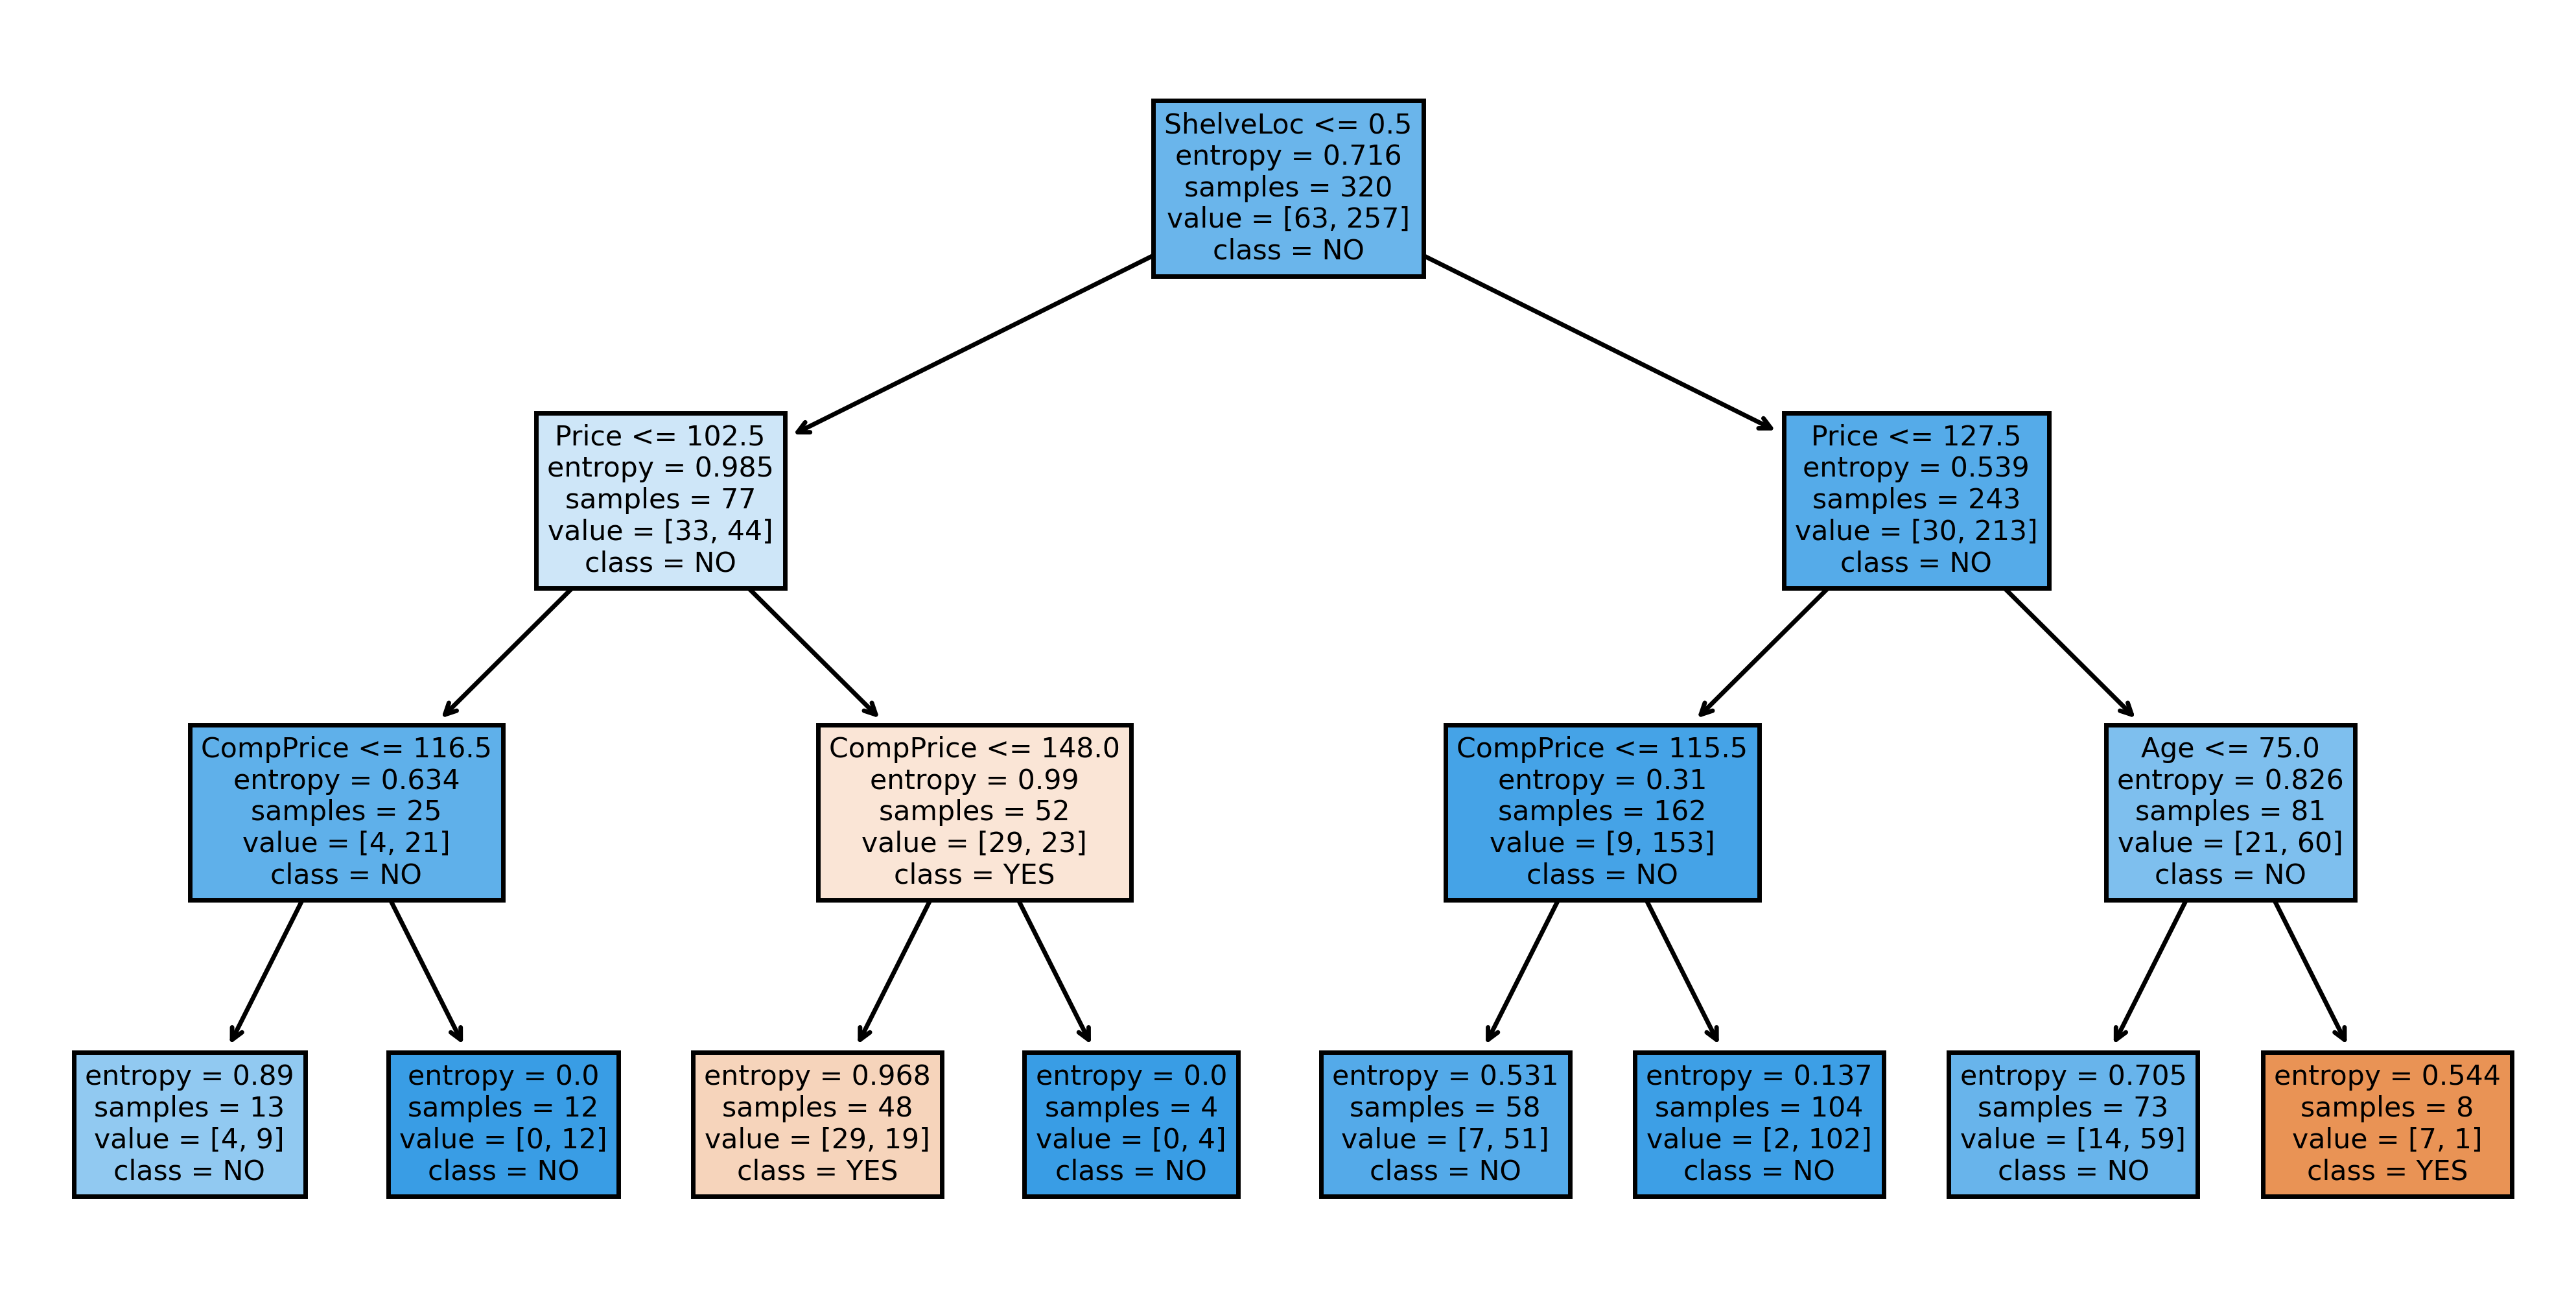

In [21]:
tree.plot_tree(dt , feature_names=['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],class_names= ['YES' , 'NO'] , filled=True )
plt.show()

In [22]:
dtc = DecisionTreeClassifier(criterion='gini' , max_depth=3)
dtc

DecisionTreeClassifier(max_depth=3)

In [23]:
dtc.fit(xtrain,ytrain)
ypred = dtc.predict(xtest)
ypred

array([0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1])

In [24]:
dt.score(xtrain , ytrain) , dt.score(xtest , ytest)

(0.853125, 0.8375)

In [25]:
print(classification_report(ypred , ytest))

              precision    recall  f1-score   support

           0       0.43      0.35      0.39        17
           1       0.83      0.87      0.85        63

    accuracy                           0.76        80
   macro avg       0.63      0.61      0.62        80
weighted avg       0.75      0.76      0.75        80



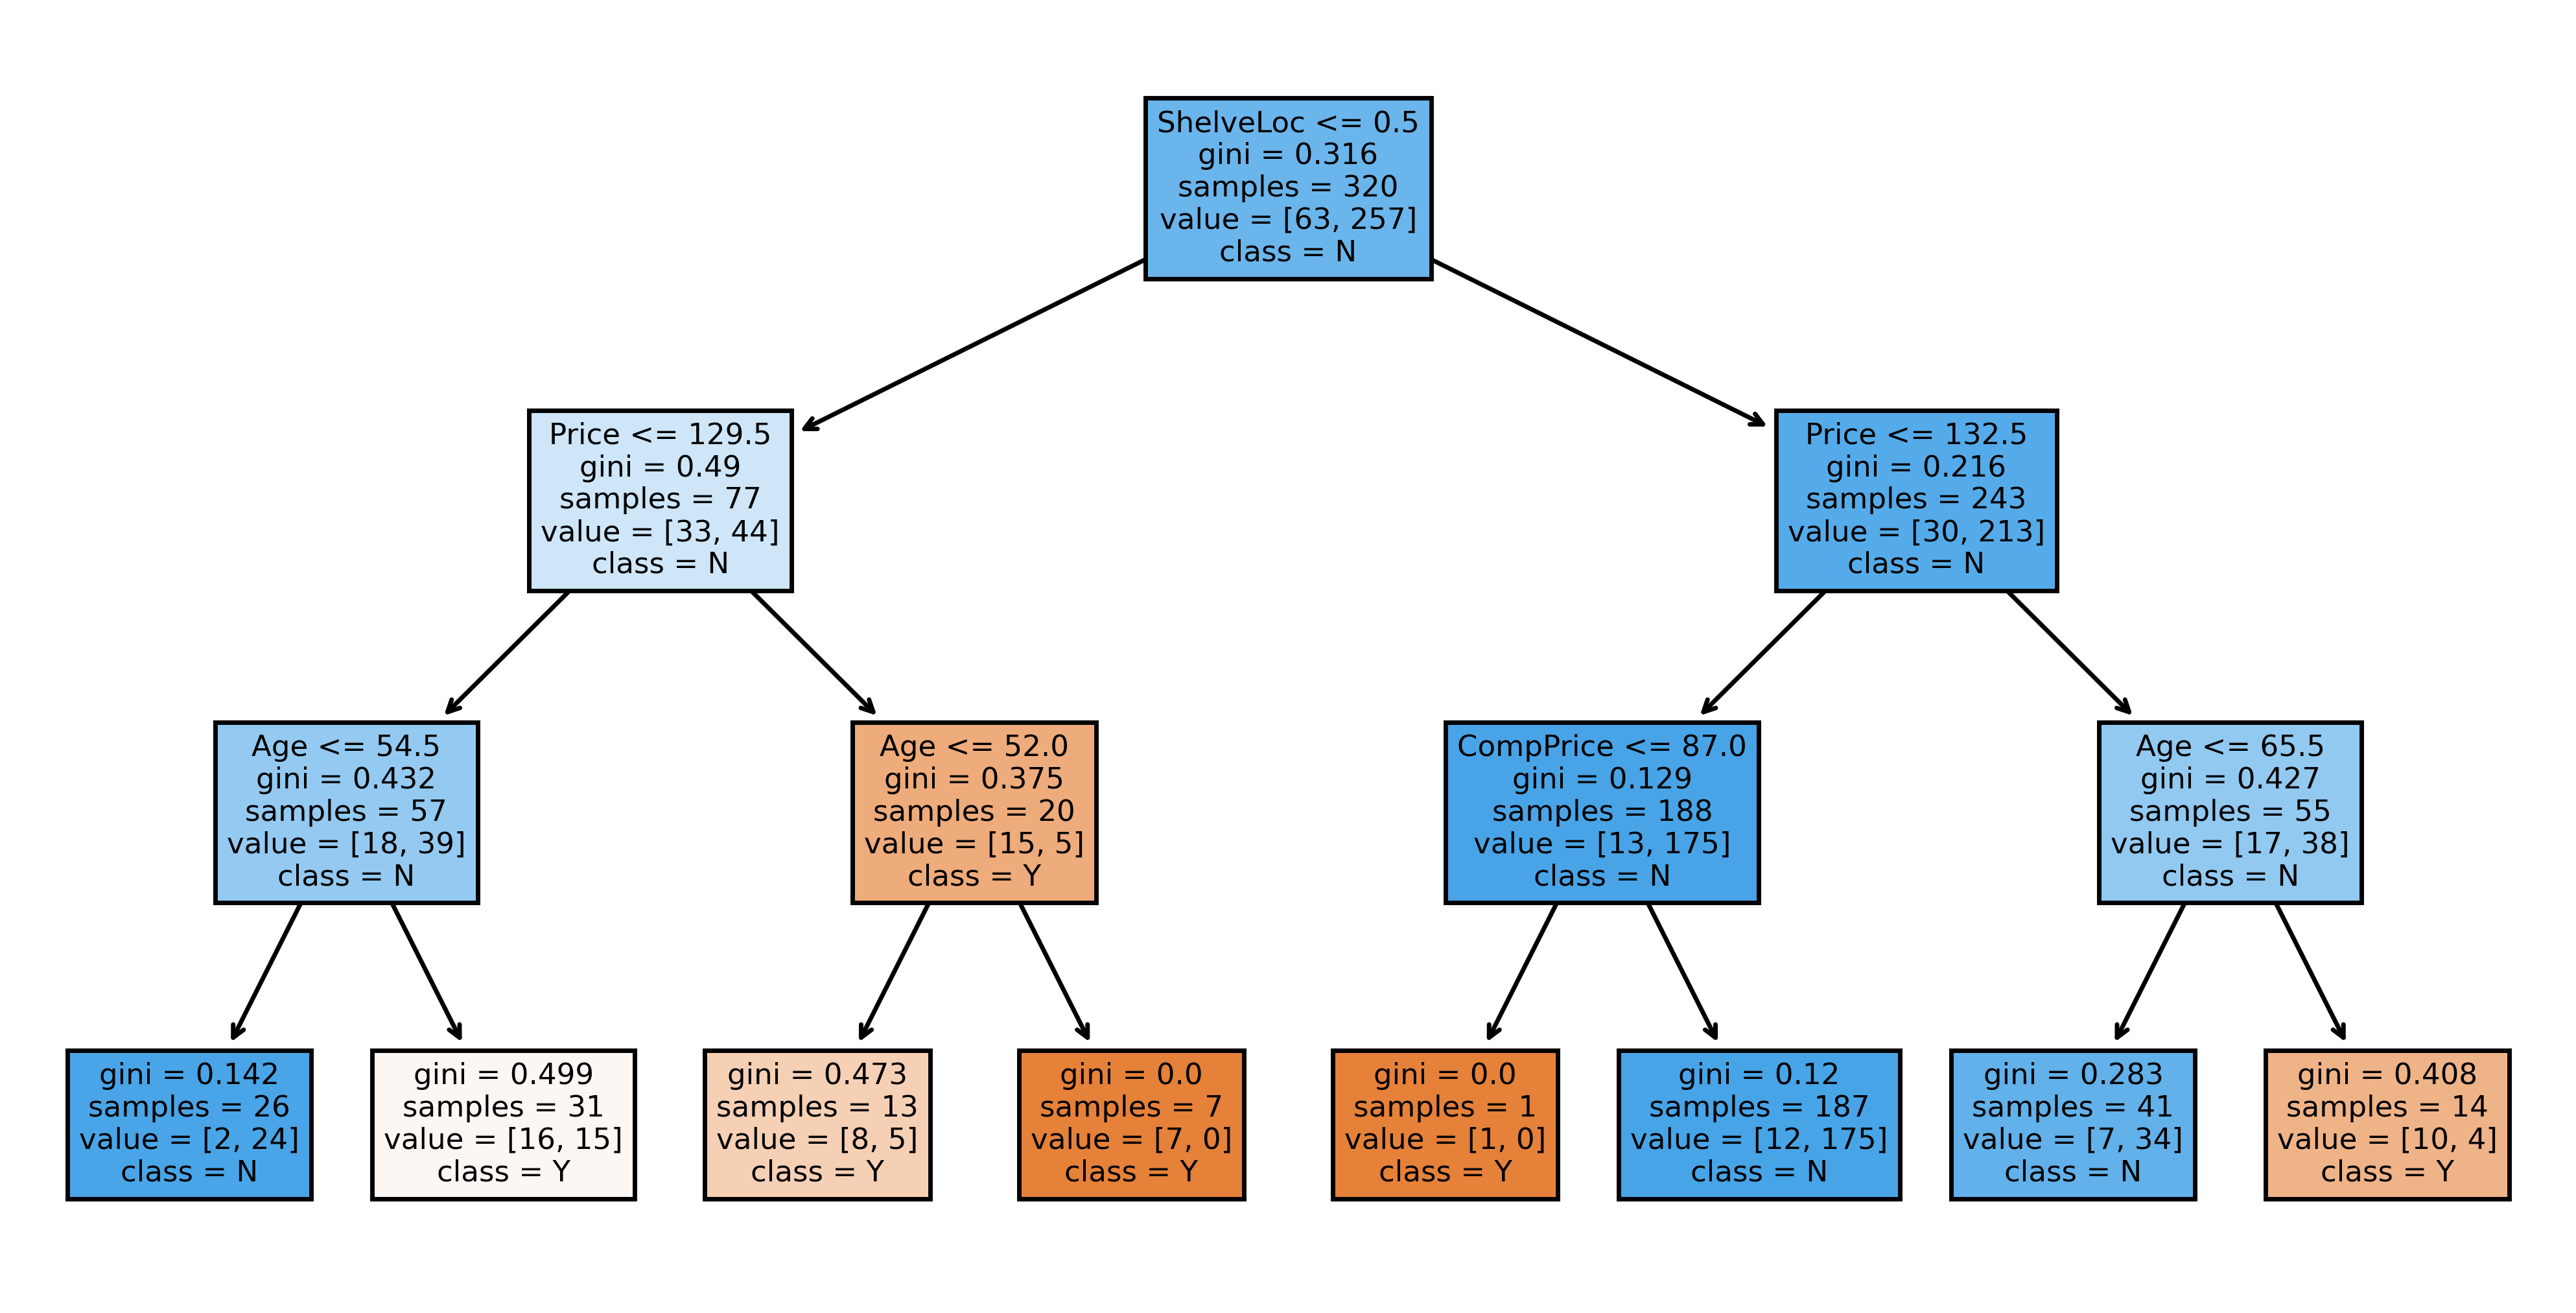

In [26]:
tree.plot_tree(dtc , feature_names=['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],class_names=['Y' , 'N'] , filled=3)
plt.show()

In [27]:
dt = DecisionTreeClassifier()

In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
para = {
   'criterion' : ["gini", "entropy", "log_loss"],
    'max_depth': [1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 ,9 ,10],
     'splitter' :['best','random']
    
}

In [30]:
grid = GridSearchCV(estimator=DecisionTreeClassifier() , param_grid=para , verbose=1)

In [31]:
grid.fit(xtrain , ytrain)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'splitter': ['best', 'random']},
             verbose=1)

In [32]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 4, 'splitter': 'random'}

In [38]:
dt = DecisionTreeClassifier(criterion='gini' , max_depth=4 , splitter='random')

In [39]:
dt.fit(xtrain , ytrain)
ypred = dt.predict(xtest)
ypred

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1])

In [40]:
dt.score(xtrain , ytrain) , dt.score(xtest , ytest)

(0.83125, 0.875)

In [41]:
print(classification_report(ypred , ytest))

              precision    recall  f1-score   support

           0       0.43      0.75      0.55         8
           1       0.97      0.89      0.93        72

    accuracy                           0.88        80
   macro avg       0.70      0.82      0.74        80
weighted avg       0.92      0.88      0.89        80



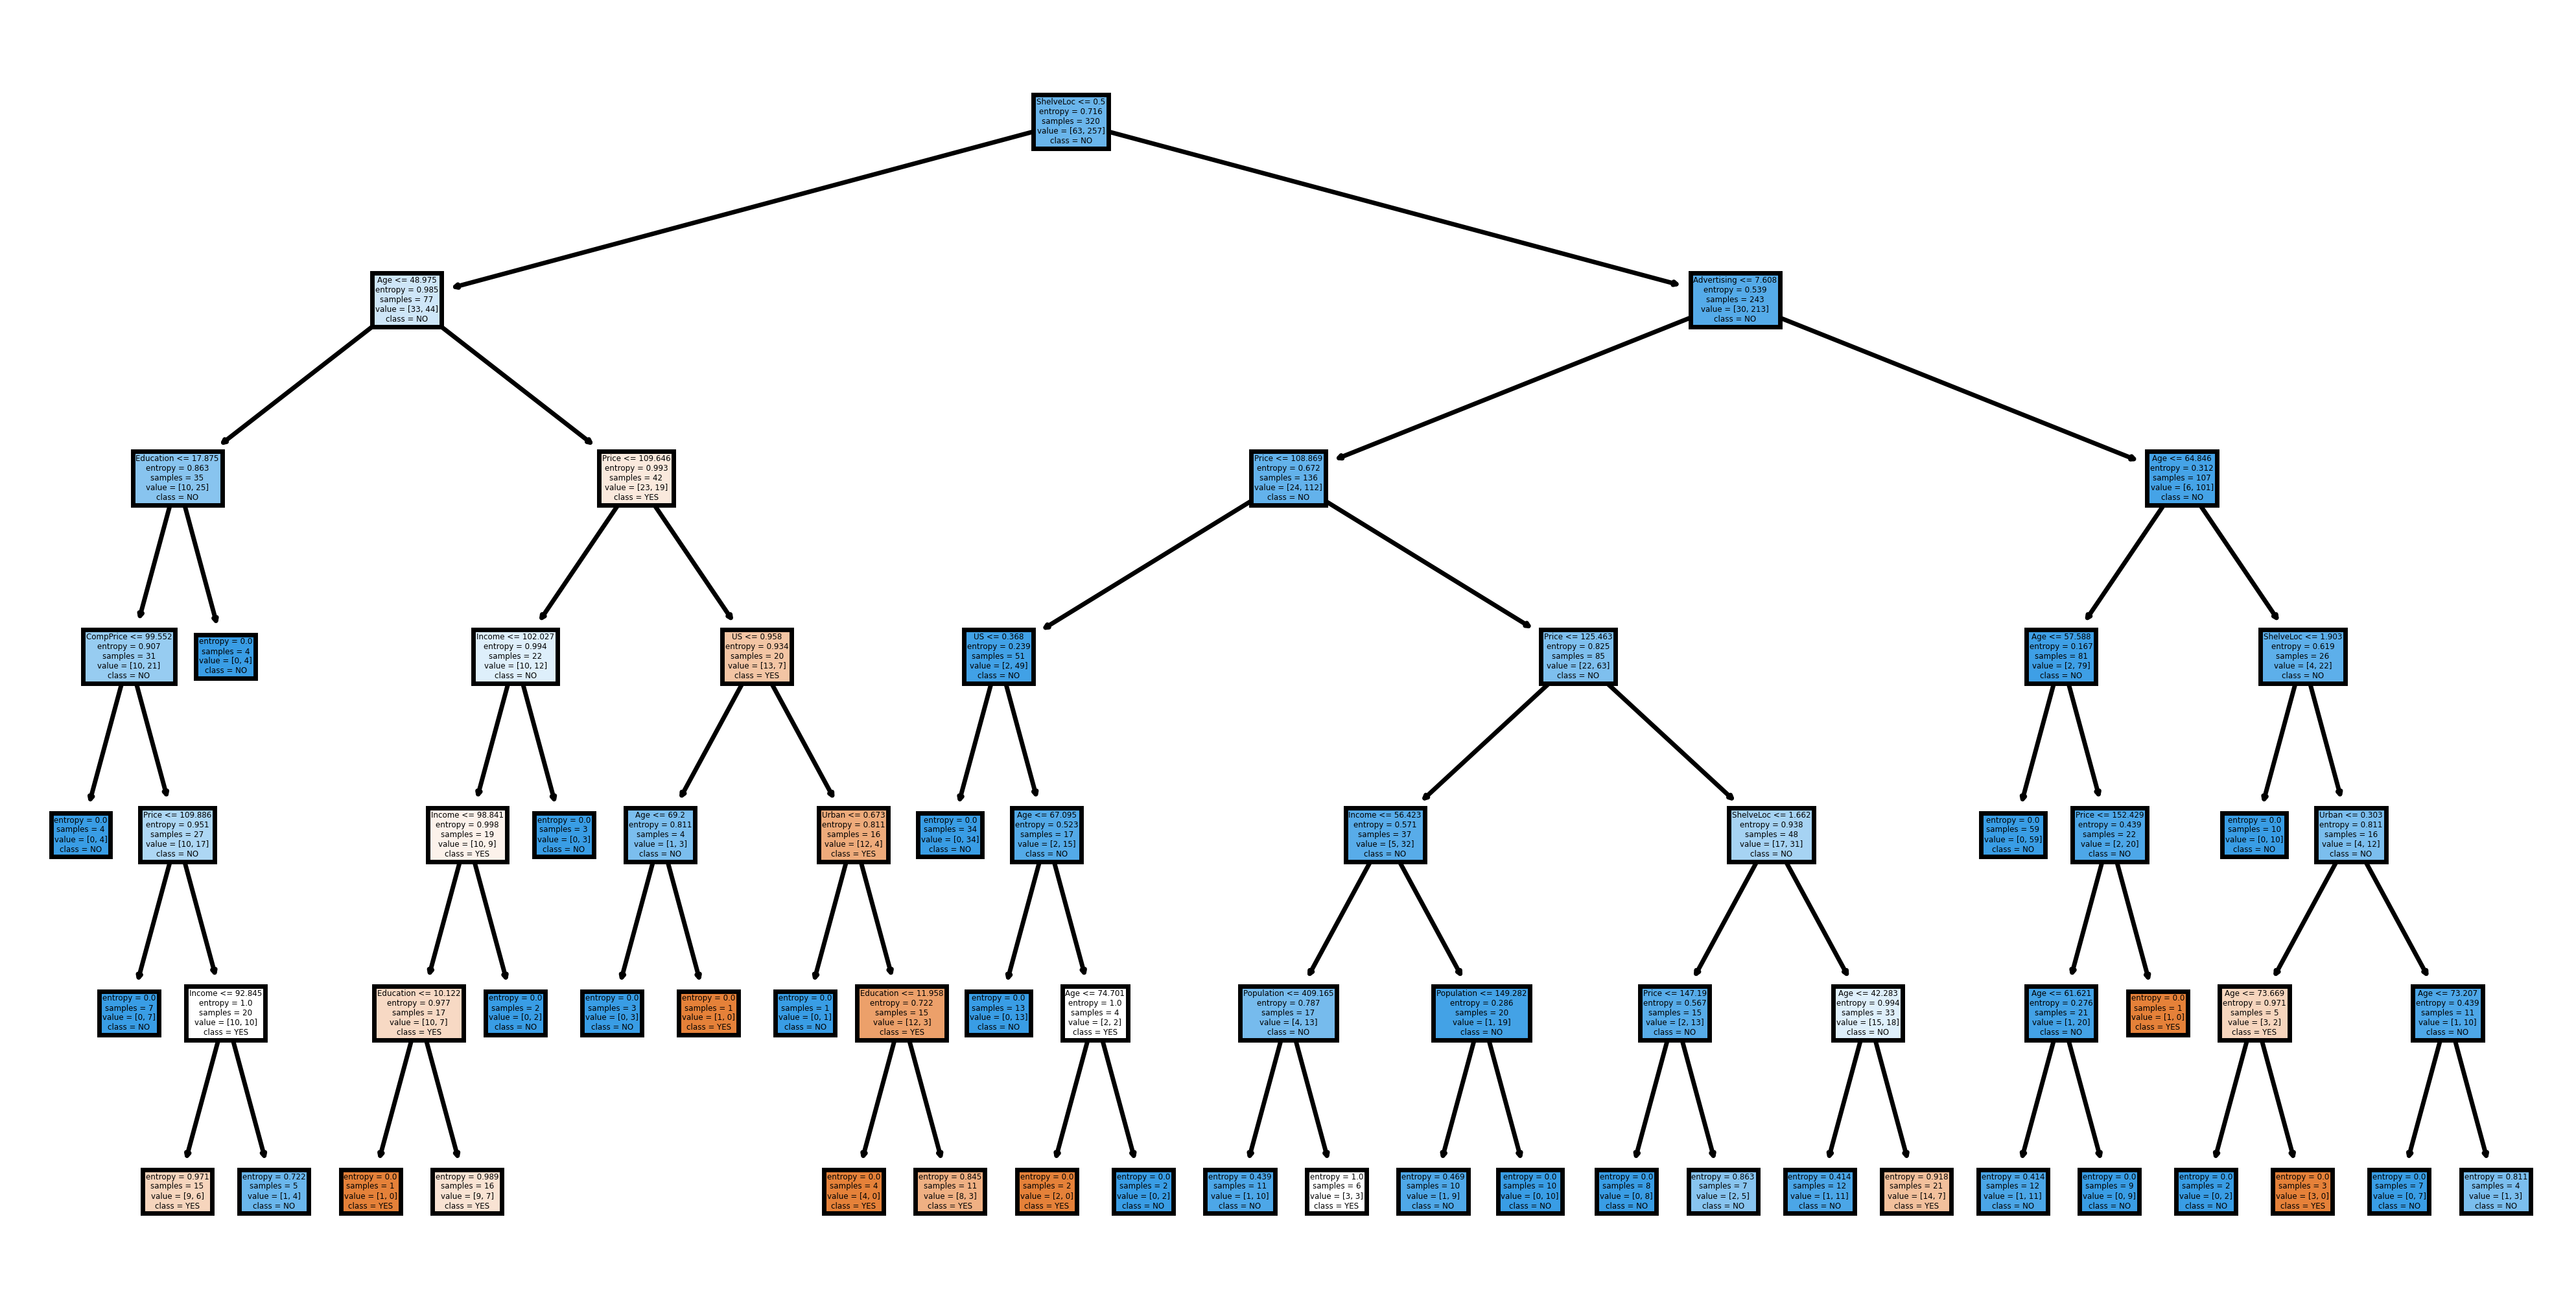

In [37]:
tree.plot_tree(dt , feature_names= ['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'] ,class_names= ['YES' , 'NO'] , filled= True )
plt.show()

# Q2→→→Ans→→→Fraud_Dataset 

In [42]:
df = pd.read_csv(r"C:\Users\mange\OneDrive\Documents\DS\Assignmnet_Material\14_Decision_Tree\Fraud_check.csv") 
df

Undergrad Marital.Status  Taxable.Income  City.Population  \
0          NO         Single           68833            50047   
1         YES       Divorced           33700           134075   
2          NO        Married           36925           160205   
3         YES         Single           50190           193264   
4          NO        Married           81002            27533   
..        ...            ...             ...              ...   
595       YES       Divorced           76340            39492   
596       YES       Divorced           69967            55369   
597        NO       Divorced           47334           154058   
598       YES        Married           98592           180083   
599        NO       Divorced           96519           158137   

     Work.Experience Urban  
0                 10   YES  
1                 18   YES  
2                 30   YES  
3                 15   YES  
4                 28    NO  
..               ...   ...  
595                7   YES  
596                2   YES  
597                0   YES  
598               17    NO  
599               16    NO  

[600 rows x 6 columns]

In [43]:
df.describe()

Taxable.Income  City.Population  Work.Experience
count      600.000000       600.000000       600.000000
mean     55208.375000    108747.368333        15.558333
std      26204.827597     49850.075134         8.842147
min      10003.000000     25779.000000         0.000000
25%      32871.500000     66966.750000         8.000000
50%      55074.500000    106493.500000        15.000000
75%      78611.750000    150114.250000        24.000000
max      99619.000000    199778.000000        30.000000

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.3+ KB


In [46]:
df.duplicated().sum()

0

In [48]:
df.columns = ['ugrad' , 'mstat' , 'tincome' , 'cpop' , 'wexp' , 'urban']
df

ugrad     mstat  tincome    cpop  wexp urban
0      NO    Single    68833   50047    10   YES
1     YES  Divorced    33700  134075    18   YES
2      NO   Married    36925  160205    30   YES
3     YES    Single    50190  193264    15   YES
4      NO   Married    81002   27533    28    NO
..    ...       ...      ...     ...   ...   ...
595   YES  Divorced    76340   39492     7   YES
596   YES  Divorced    69967   55369     2   YES
597    NO  Divorced    47334  154058     0   YES
598   YES   Married    98592  180083    17    NO
599    NO  Divorced    96519  158137    16    NO

[600 rows x 6 columns]

In [49]:
df['tincome'] = np.where(df['tincome'] <= 30000 , 'Risky' , 'Good')
df

ugrad     mstat tincome    cpop  wexp urban
0      NO    Single    Good   50047    10   YES
1     YES  Divorced    Good  134075    18   YES
2      NO   Married    Good  160205    30   YES
3     YES    Single    Good  193264    15   YES
4      NO   Married    Good   27533    28    NO
..    ...       ...     ...     ...   ...   ...
595   YES  Divorced    Good   39492     7   YES
596   YES  Divorced    Good   55369     2   YES
597    NO  Divorced    Good  154058     0   YES
598   YES   Married    Good  180083    17    NO
599    NO  Divorced    Good  158137    16    NO

[600 rows x 6 columns]

In [50]:
df['tincome'].value_counts()

tincome
Good     476
Risky    124
Name: count, dtype: int64

In [55]:
lb = LabelEncoder()

In [56]:
def c_int(dataframe , *columns):
    for column in columns:
        dataframe[column] = lb.fit_transform(dataframe[column])

In [57]:
df

ugrad     mstat tincome    cpop  wexp urban
0      NO    Single    Good   50047    10   YES
1     YES  Divorced    Good  134075    18   YES
2      NO   Married    Good  160205    30   YES
3     YES    Single    Good  193264    15   YES
4      NO   Married    Good   27533    28    NO
..    ...       ...     ...     ...   ...   ...
595   YES  Divorced    Good   39492     7   YES
596   YES  Divorced    Good   55369     2   YES
597    NO  Divorced    Good  154058     0   YES
598   YES   Married    Good  180083    17    NO
599    NO  Divorced    Good  158137    16    NO

[600 rows x 6 columns]

In [58]:
c_int(df , 'ugrad' , 'mstat' , 'tincome' , 'urban')

In [59]:
df

ugrad  mstat  tincome    cpop  wexp  urban
0        0      2        0   50047    10      1
1        1      0        0  134075    18      1
2        0      1        0  160205    30      1
3        1      2        0  193264    15      1
4        0      1        0   27533    28      0
..     ...    ...      ...     ...   ...    ...
595      1      0        0   39492     7      1
596      1      0        0   55369     2      1
597      0      0        0  154058     0      1
598      1      1        0  180083    17      0
599      0      0        0  158137    16      0

[600 rows x 6 columns]

In [60]:
df['tincome'].value_counts()

tincome
0    476
1    124
Name: count, dtype: int64

In [65]:
x = df[['ugrad','mstat', 'cpop','wexp','urban']]
y = df['tincome']

In [66]:
x

ugrad  mstat    cpop  wexp  urban
0        0      2   50047    10      1
1        1      0  134075    18      1
2        0      1  160205    30      1
3        1      2  193264    15      1
4        0      1   27533    28      0
..     ...    ...     ...   ...    ...
595      1      0   39492     7      1
596      1      0   55369     2      1
597      0      0  154058     0      1
598      1      1  180083    17      0
599      0      0  158137    16      0

[600 rows x 5 columns]

In [67]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: tincome, Length: 600, dtype: int32

In [70]:
xtr , xte , ytr , yte = train_test_split(x , y , test_size=0.2 , random_state= 42)
xtr

ugrad  mstat    cpop  wexp  urban
145      0      0  197422     2      1
9        1      0  155482     4      1
375      0      1  130935     2      0
523      0      0   42198    12      0
188      0      0  137569    10      0
..     ...    ...     ...   ...    ...
71       0      2  105680    22      0
106      1      2   58535    20      1
270      0      1  130680     5      0
435      0      0  111774     4      1
102      1      0   91488    23      0

[480 rows x 5 columns]

In [72]:
xte

ugrad  mstat    cpop  wexp  urban
110      0      2   32450    19      1
419      0      1  138074    20      0
565      0      0   31064    28      0
77       1      1  118344    26      0
181      0      0   36116    20      0
..     ...    ...     ...   ...    ...
399      0      2   74497    21      0
340      1      1   54437    21      1
148      0      1  197038    21      0
494      0      2  197045    13      1
439      1      0   48956     8      0

[120 rows x 5 columns]

In [73]:
ytr

145    0
9      0
375    0
523    0
188    1
      ..
71     0
106    1
270    0
435    0
102    0
Name: tincome, Length: 480, dtype: int32

In [74]:
yte

110    1
419    0
565    0
77     0
181    1
      ..
399    0
340    0
148    0
494    0
439    1
Name: tincome, Length: 120, dtype: int32

In [76]:
dt = DecisionTreeClassifier(criterion='entropy' , max_depth=3)
dt

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [77]:
dt.fit(xtr , ytr)
ypred = dt.predict(xte)
ypred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [78]:
dt.score(xtr , ytr) , dt.score(xte , yte)

(0.8020833333333334, 0.7666666666666667)

In [79]:
print(classification_report(ypred , yte))

              precision    recall  f1-score   support

           0       0.98      0.78      0.87       118
           1       0.00      0.00      0.00         2

    accuracy                           0.77       120
   macro avg       0.49      0.39      0.43       120
weighted avg       0.96      0.77      0.85       120



In [80]:
x.columns

Index(['ugrad', 'mstat', 'cpop', 'wexp', 'urban'], dtype='object')

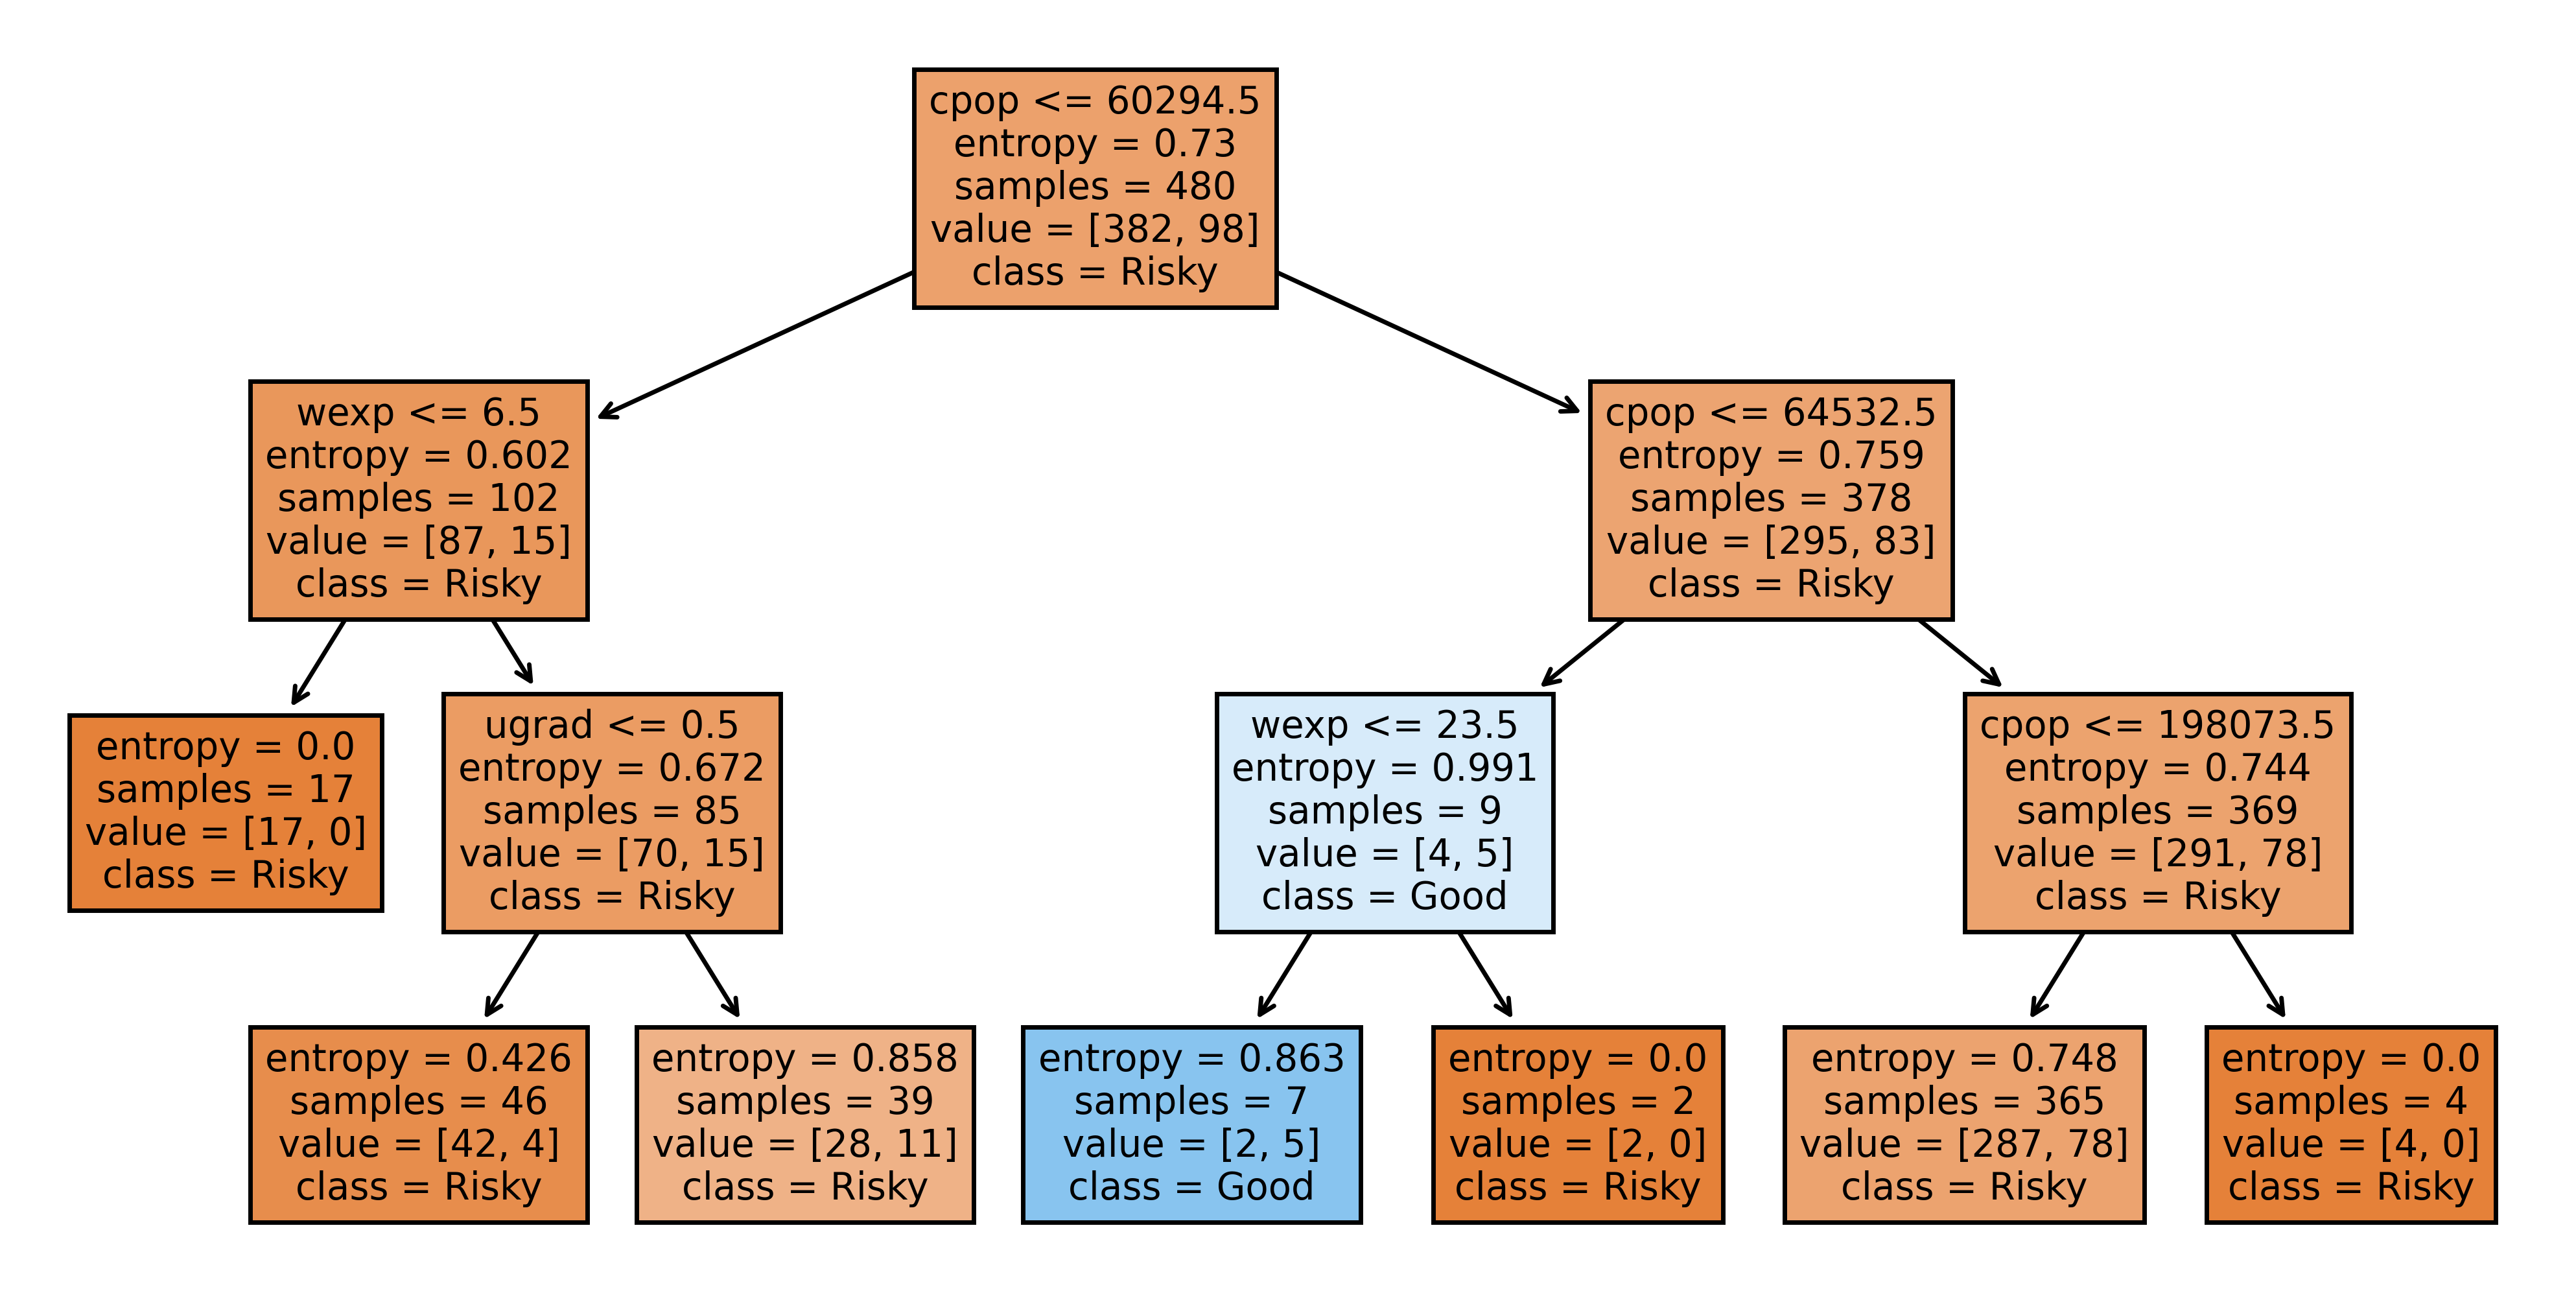

In [82]:
tree.plot_tree(dt , feature_names=['ugrad', 'mstat', 'cpop', 'wexp', 'urban'] , class_names=['Risky' , 'Good'] , filled=True )
plt.show()

In [83]:
dtc = DecisionTreeClassifier(criterion='gini' , max_depth=3)
dtc

DecisionTreeClassifier(max_depth=3)

In [84]:
dtc.fit(xtr , ytr)
ypred = dtc.predict(xte)
ypred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [86]:
dt.score(xtr , ytr) , dt.score(xte , yte)

(0.8020833333333334, 0.7666666666666667)

In [85]:
print(classification_report(ypred , yte))

              precision    recall  f1-score   support

           0       0.97      0.78      0.86       117
           1       0.00      0.00      0.00         3

    accuracy                           0.76       120
   macro avg       0.48      0.39      0.43       120
weighted avg       0.94      0.76      0.84       120



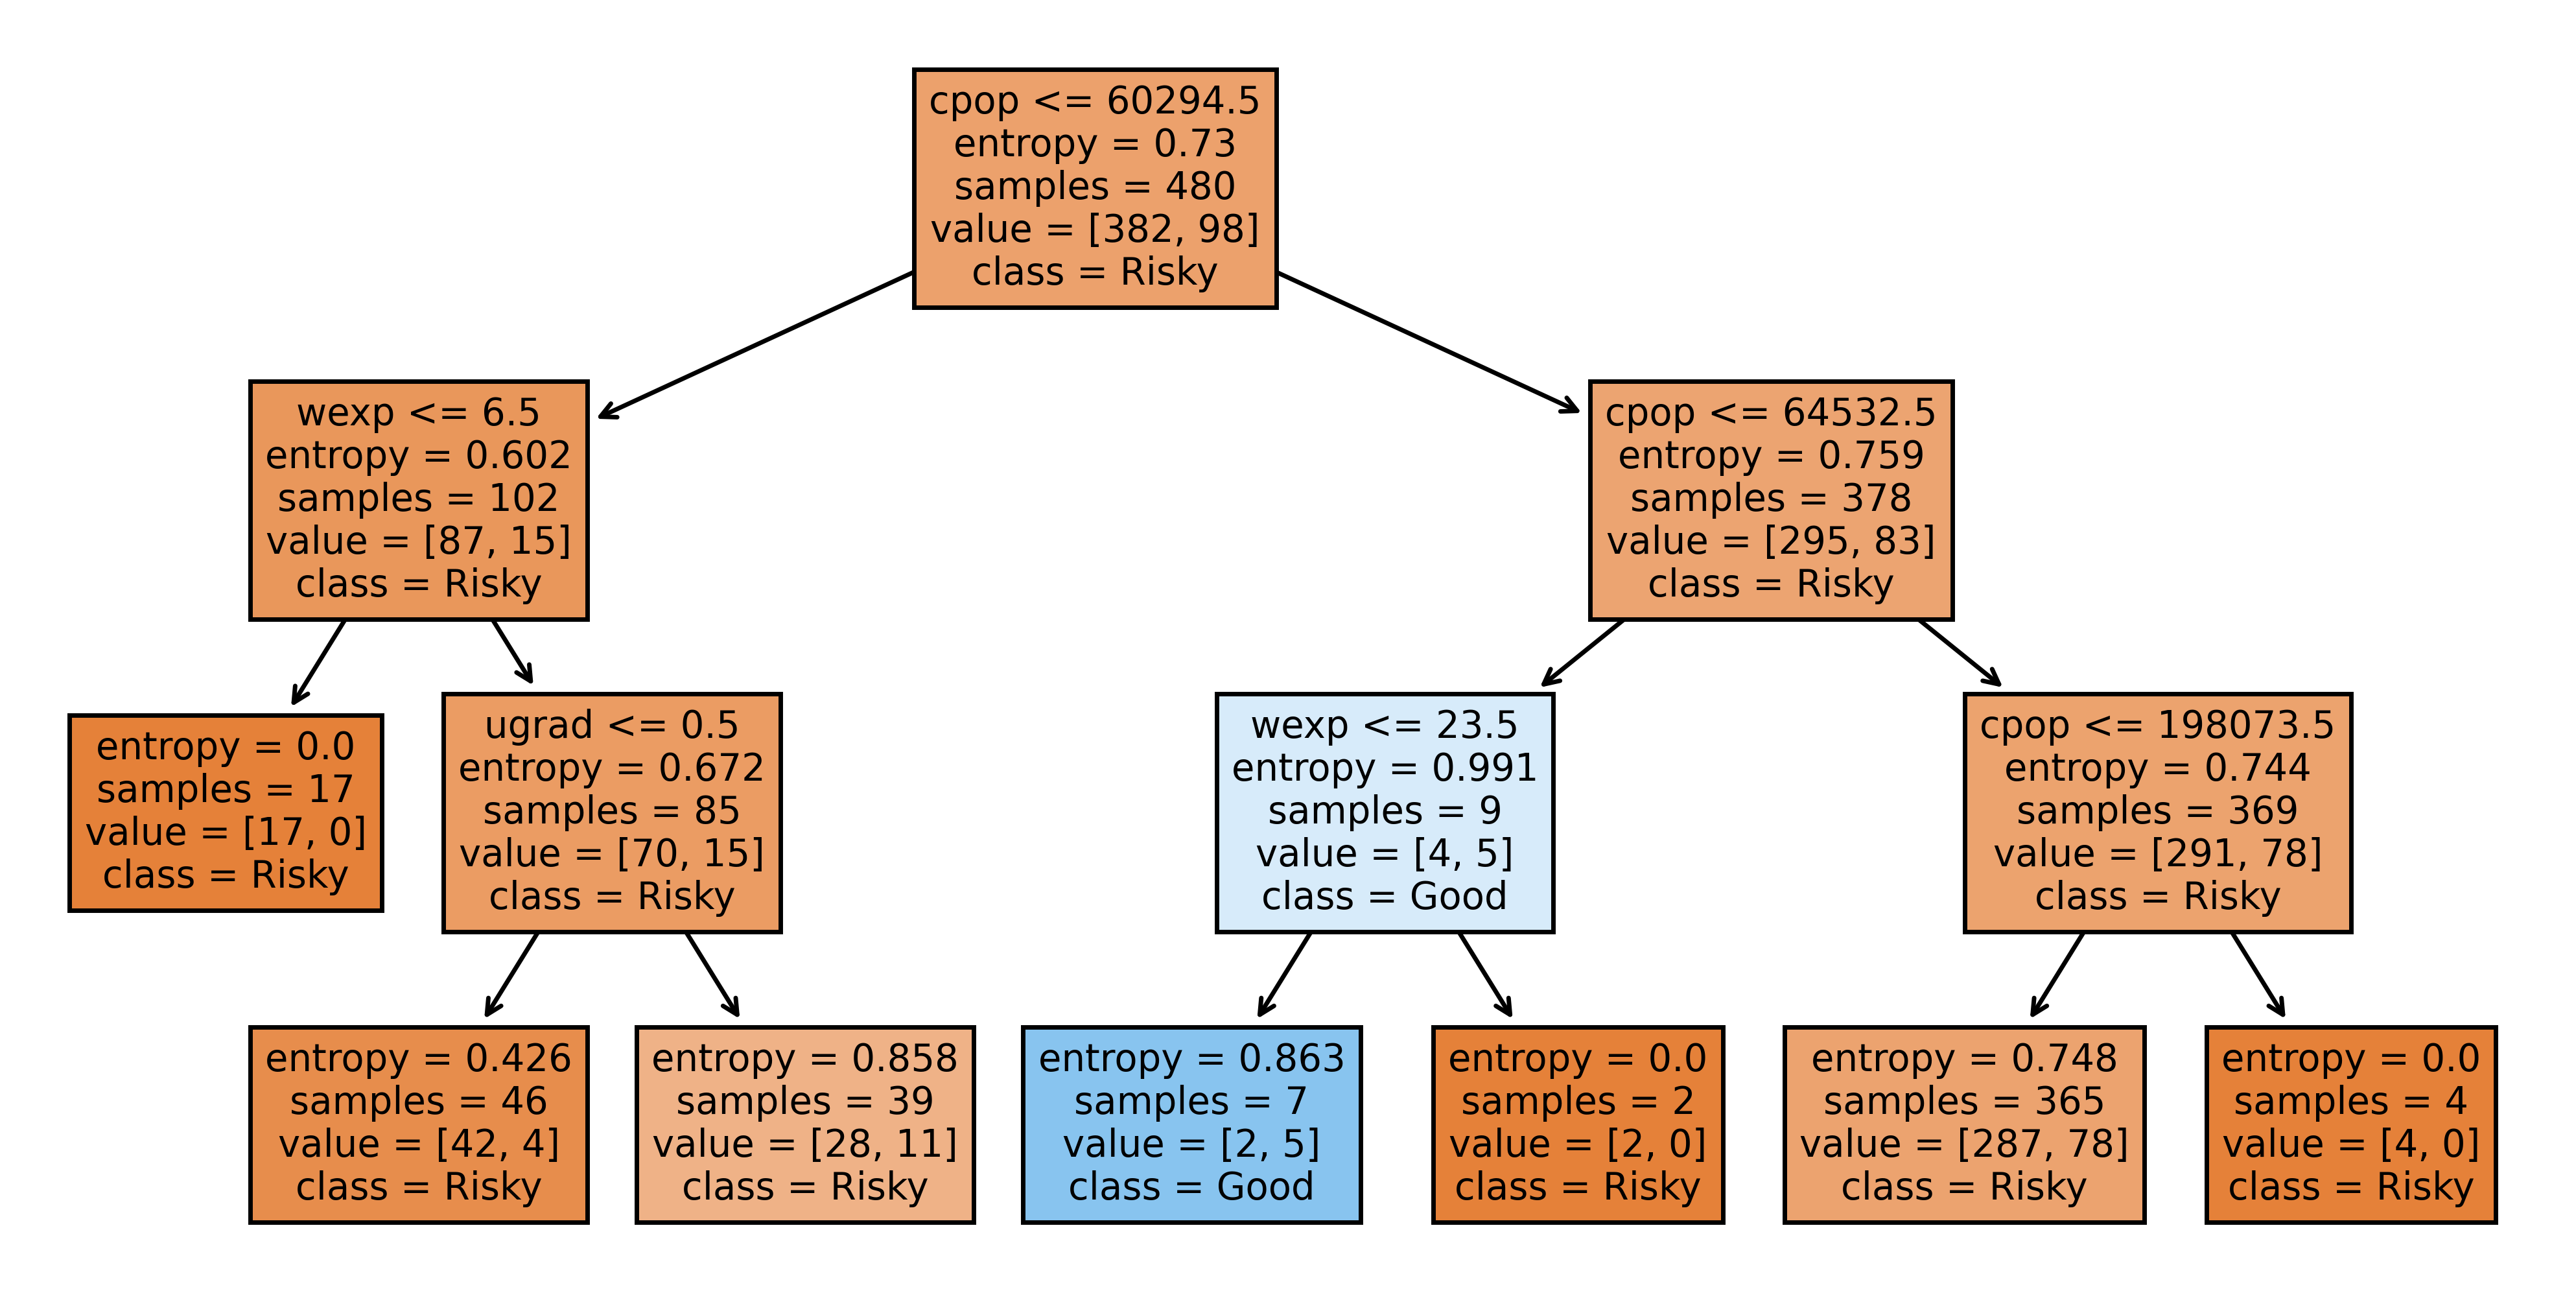

In [99]:
tree.plot_tree(dt , feature_names=['ugrad', 'mstat', 'cpop', 'wexp', 'urban'] , class_names=['Risky' , 'Good'] , filled=True )
plt.show()

In [87]:
grid

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'splitter': ['best', 'random']},
             verbose=1)

In [88]:
para = {
   'criterion' : ["gini", "entropy", "log_loss"],
    'max_depth': [1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 ,9 ,10],
     'splitter' :['best','random']
    
}

In [89]:
grid = GridSearchCV(estimator=DecisionTreeClassifier() , param_grid=para , verbose=1)

In [90]:
grid.fit(xtr , ytr)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'splitter': ['best', 'random']},
             verbose=1)

In [91]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 1, 'splitter': 'random'}

In [101]:
dtc = DecisionTreeClassifier(criterion = 'gini', max_depth=3, splitter= 'random')
dtc

DecisionTreeClassifier(max_depth=3, splitter='random')

In [102]:
dtc.fit(xtr , ytr)
ypred = dtc.predict(xte)
ypred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [103]:
dt.score(xtr , ytr) , dt.score(xte , yte)

(0.8020833333333334, 0.7666666666666667)

In [104]:
print(classification_report(ypred , yte))

              precision    recall  f1-score   support

           0       1.00      0.78      0.88       120
           1       0.00      0.00      0.00         0

    accuracy                           0.78       120
   macro avg       0.50      0.39      0.44       120
weighted avg       1.00      0.78      0.88       120



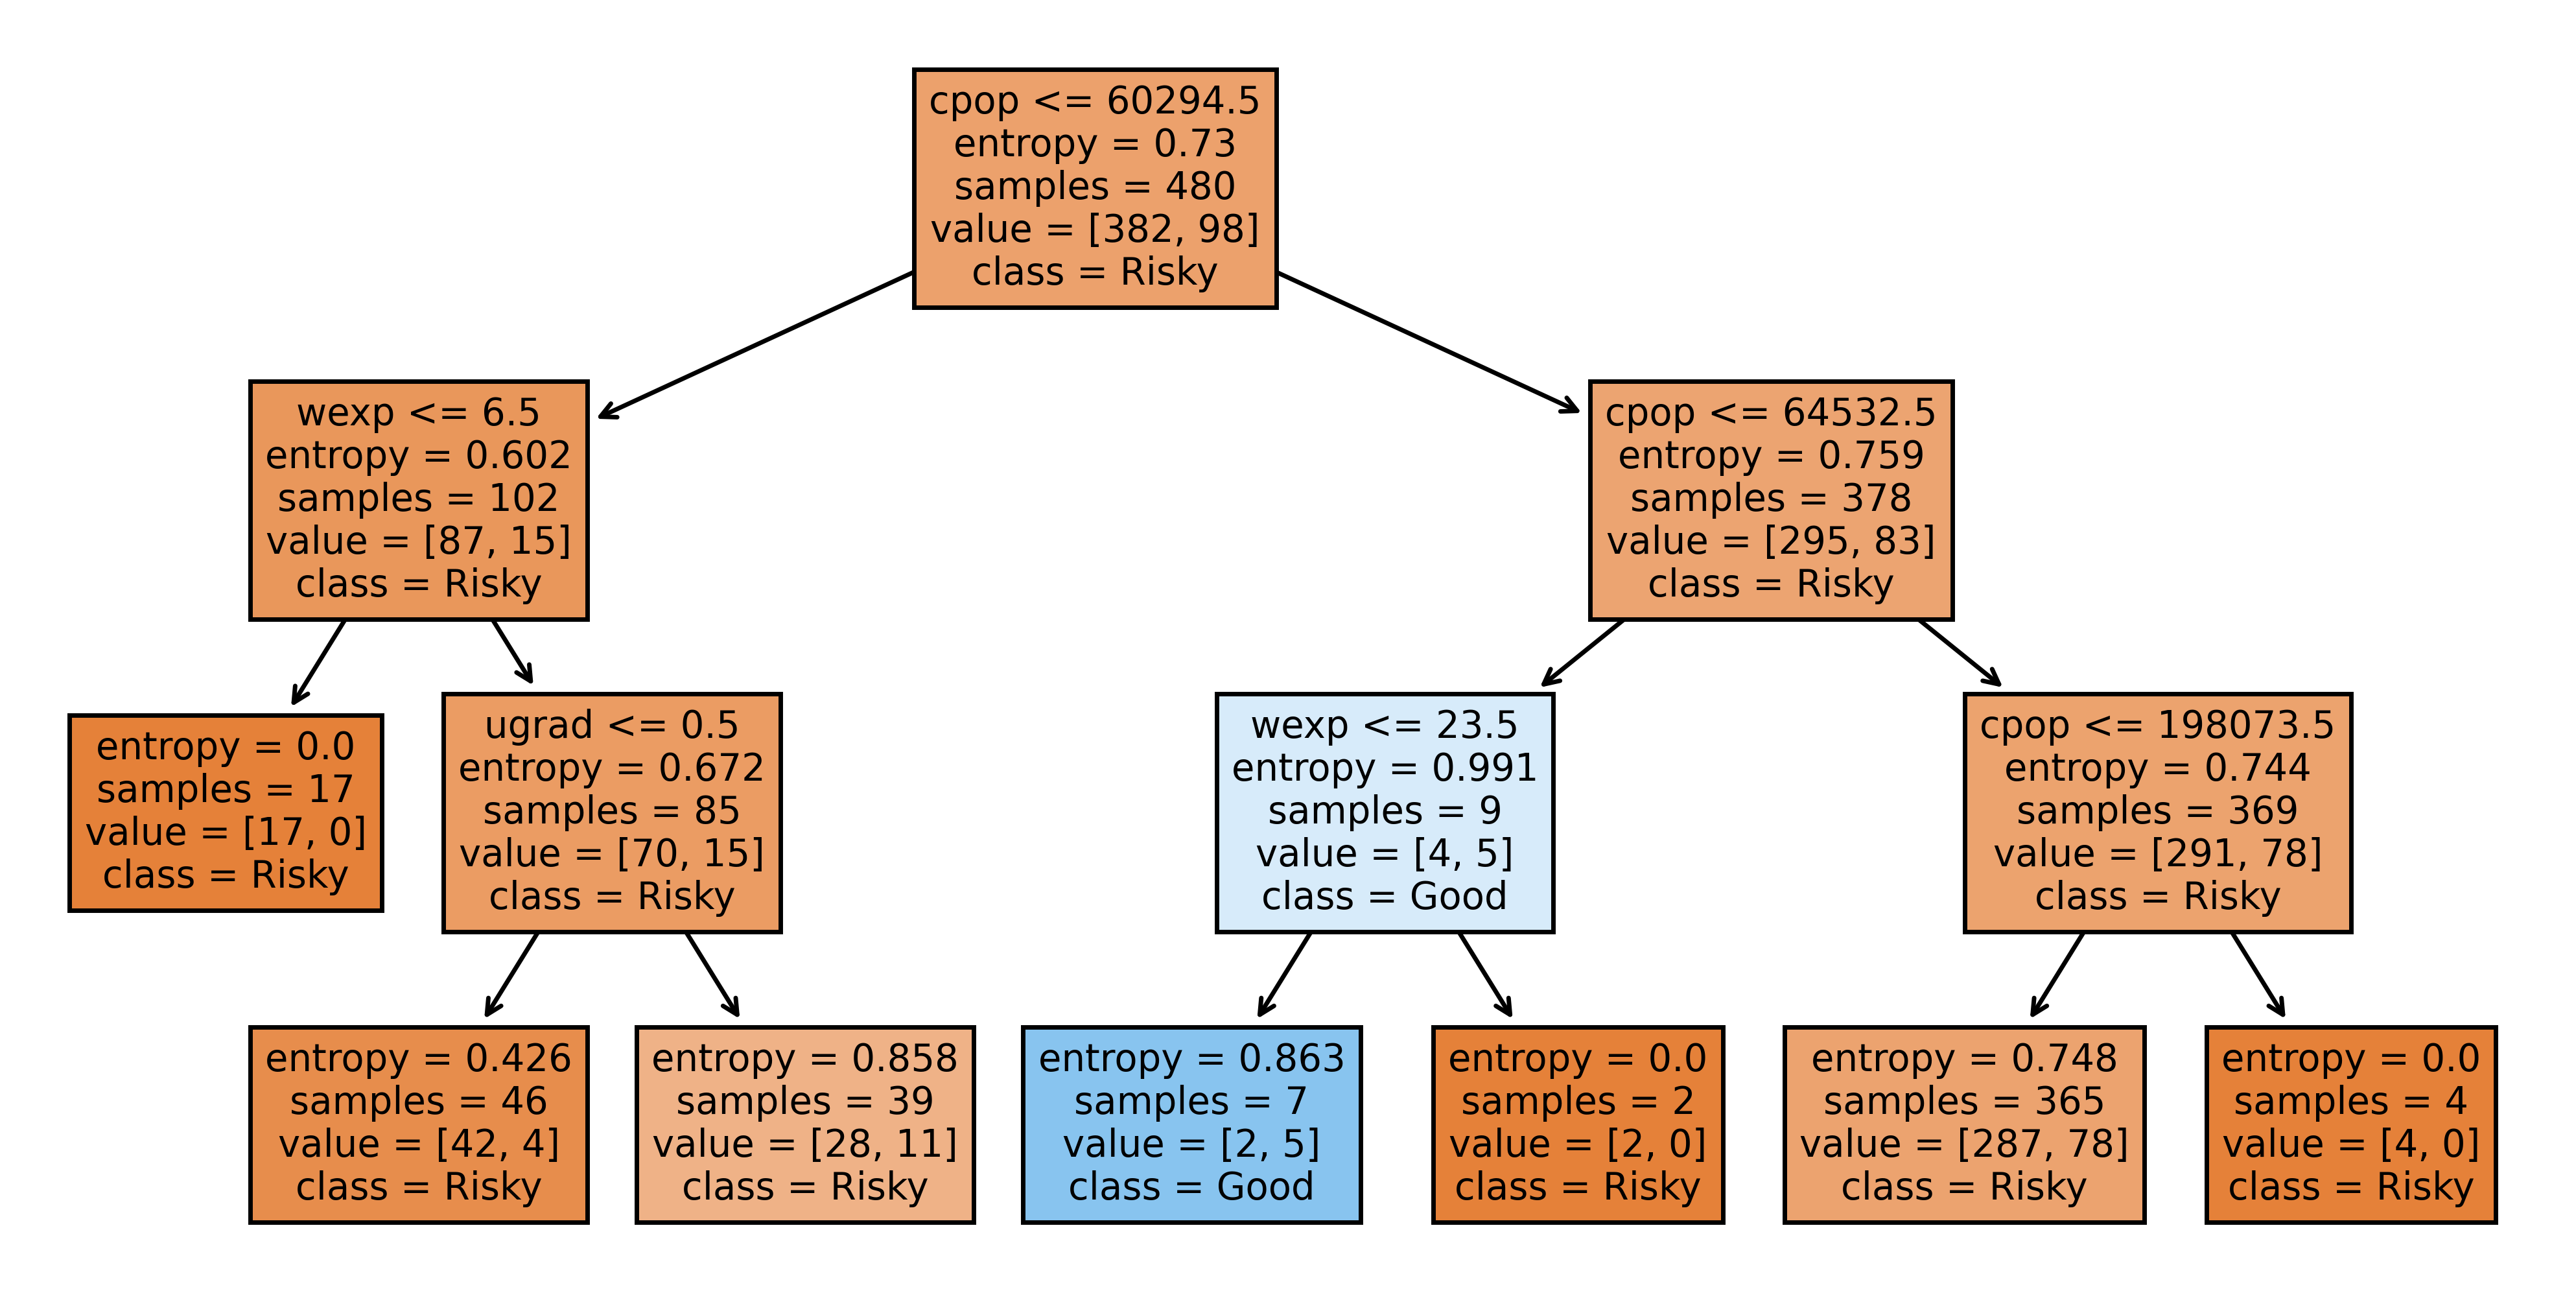

In [105]:
tree.plot_tree(dt , feature_names=['ugrad', 'mstat', 'cpop', 'wexp', 'urban'] , class_names=['Risky' , 'Good'] , filled=True )
plt.show()

In [107]:
dtr = DecisionTreeRegressor(criterion='squared_error',
    splitter='best',
    max_depth=3,)
dtr

DecisionTreeRegressor(max_depth=3)

In [108]:
dtr.fit(xtr , ytr)
ypred = dtr.predict(xte)
ypred

array([0.        , 0.22924901, 0.11111111, 0.22924901, 0.11111111,
       0.17241379, 0.22924901, 0.22924901, 0.17241379, 0.17241379,
       0.22924901, 0.17241379, 0.22924901, 0.22924901, 0.22924901,
       0.22924901, 0.17241379, 0.17241379, 0.17241379, 0.17241379,
       0.22924901, 0.22924901, 0.22924901, 0.19565217, 0.17241379,
       0.19565217, 0.17241379, 0.17241379, 0.        , 0.22924901,
       0.19565217, 0.17241379, 0.17241379, 0.19565217, 0.22924901,
       0.19565217, 0.17241379, 0.17241379, 0.17241379, 0.19565217,
       0.71428571, 0.19565217, 0.22924901, 0.22924901, 0.11111111,
       0.17241379, 0.22924901, 0.22924901, 0.17241379, 0.22924901,
       0.22924901, 0.22924901, 0.19565217, 0.        , 0.22924901,
       0.11111111, 0.22924901, 0.19565217, 0.22924901, 0.22924901,
       0.22924901, 0.22924901, 0.        , 0.22924901, 0.17241379,
       0.17241379, 0.11111111, 0.19565217, 0.17241379, 0.22924901,
       0.17241379, 0.17241379, 0.22924901, 0.17241379, 0.22924

In [109]:
dt.score(xtr , ytr) , dt.score(xte , yte)

(0.8020833333333334, 0.7666666666666667)

In [111]:
grid

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'splitter': ['best', 'random']},
             verbose=1)

In [114]:
params = {
    'criterion' : ['squared_error','absolute_error'],
    'max_depth' : [3,5,7,9,11],
    'splitter' :['best','random']
}

In [122]:
grid = GridSearchCV(estimator=DecisionTreeRegressor() , param_grid=params , verbose=1)


In [123]:
grid.fit(xtr , ytr)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [3, 5, 7, 9, 11],
                         'splitter': ['best', 'random']},
             verbose=1)

In [124]:
grid.best_params_

{'criterion': 'squared_error', 'max_depth': 3, 'splitter': 'random'}

In [125]:
dtr = DecisionTreeRegressor(criterion='squared_error', max_depth= 3, splitter= 'random')

In [126]:
dtr.fit(xtr , ytr)
ypred = dtr.predict(xte)
ypred

array([0.20496894, 0.25342466, 0.18181818, 0.25342466, 0.18181818,
       0.14285714, 0.20496894, 0.20496894, 0.27272727, 0.20496894,
       0.20496894, 0.18181818, 0.14285714, 0.20496894, 0.25342466,
       0.25342466, 0.27272727, 0.18181818, 0.20496894, 0.20496894,
       0.14285714, 0.14285714, 0.25342466, 0.27272727, 0.18181818,
       0.18181818, 0.20496894, 0.20496894, 0.25342466, 0.20496894,
       0.20496894, 0.20496894, 0.20496894, 0.20496894, 0.20496894,
       0.25342466, 0.18181818, 0.18181818, 0.18181818, 0.27272727,
       0.25342466, 0.20496894, 0.20496894, 0.14285714, 0.18181818,
       0.20496894, 0.20496894, 0.25342466, 0.18181818, 0.25342466,
       0.25342466, 0.20496894, 0.20496894, 0.25342466, 0.20496894,
       0.25342466, 0.14285714, 0.20496894, 0.25342466, 0.14285714,
       0.25342466, 0.25342466, 0.25342466, 0.25342466, 0.14285714,
       0.20496894, 0.20496894, 0.25342466, 0.18181818, 0.25342466,
       0.20496894, 0.20496894, 0.20496894, 0.20496894, 0.14285

In [127]:
dt.score(xtr , ytr) , dt.score(xte , yte)

(0.8020833333333334, 0.7666666666666667)

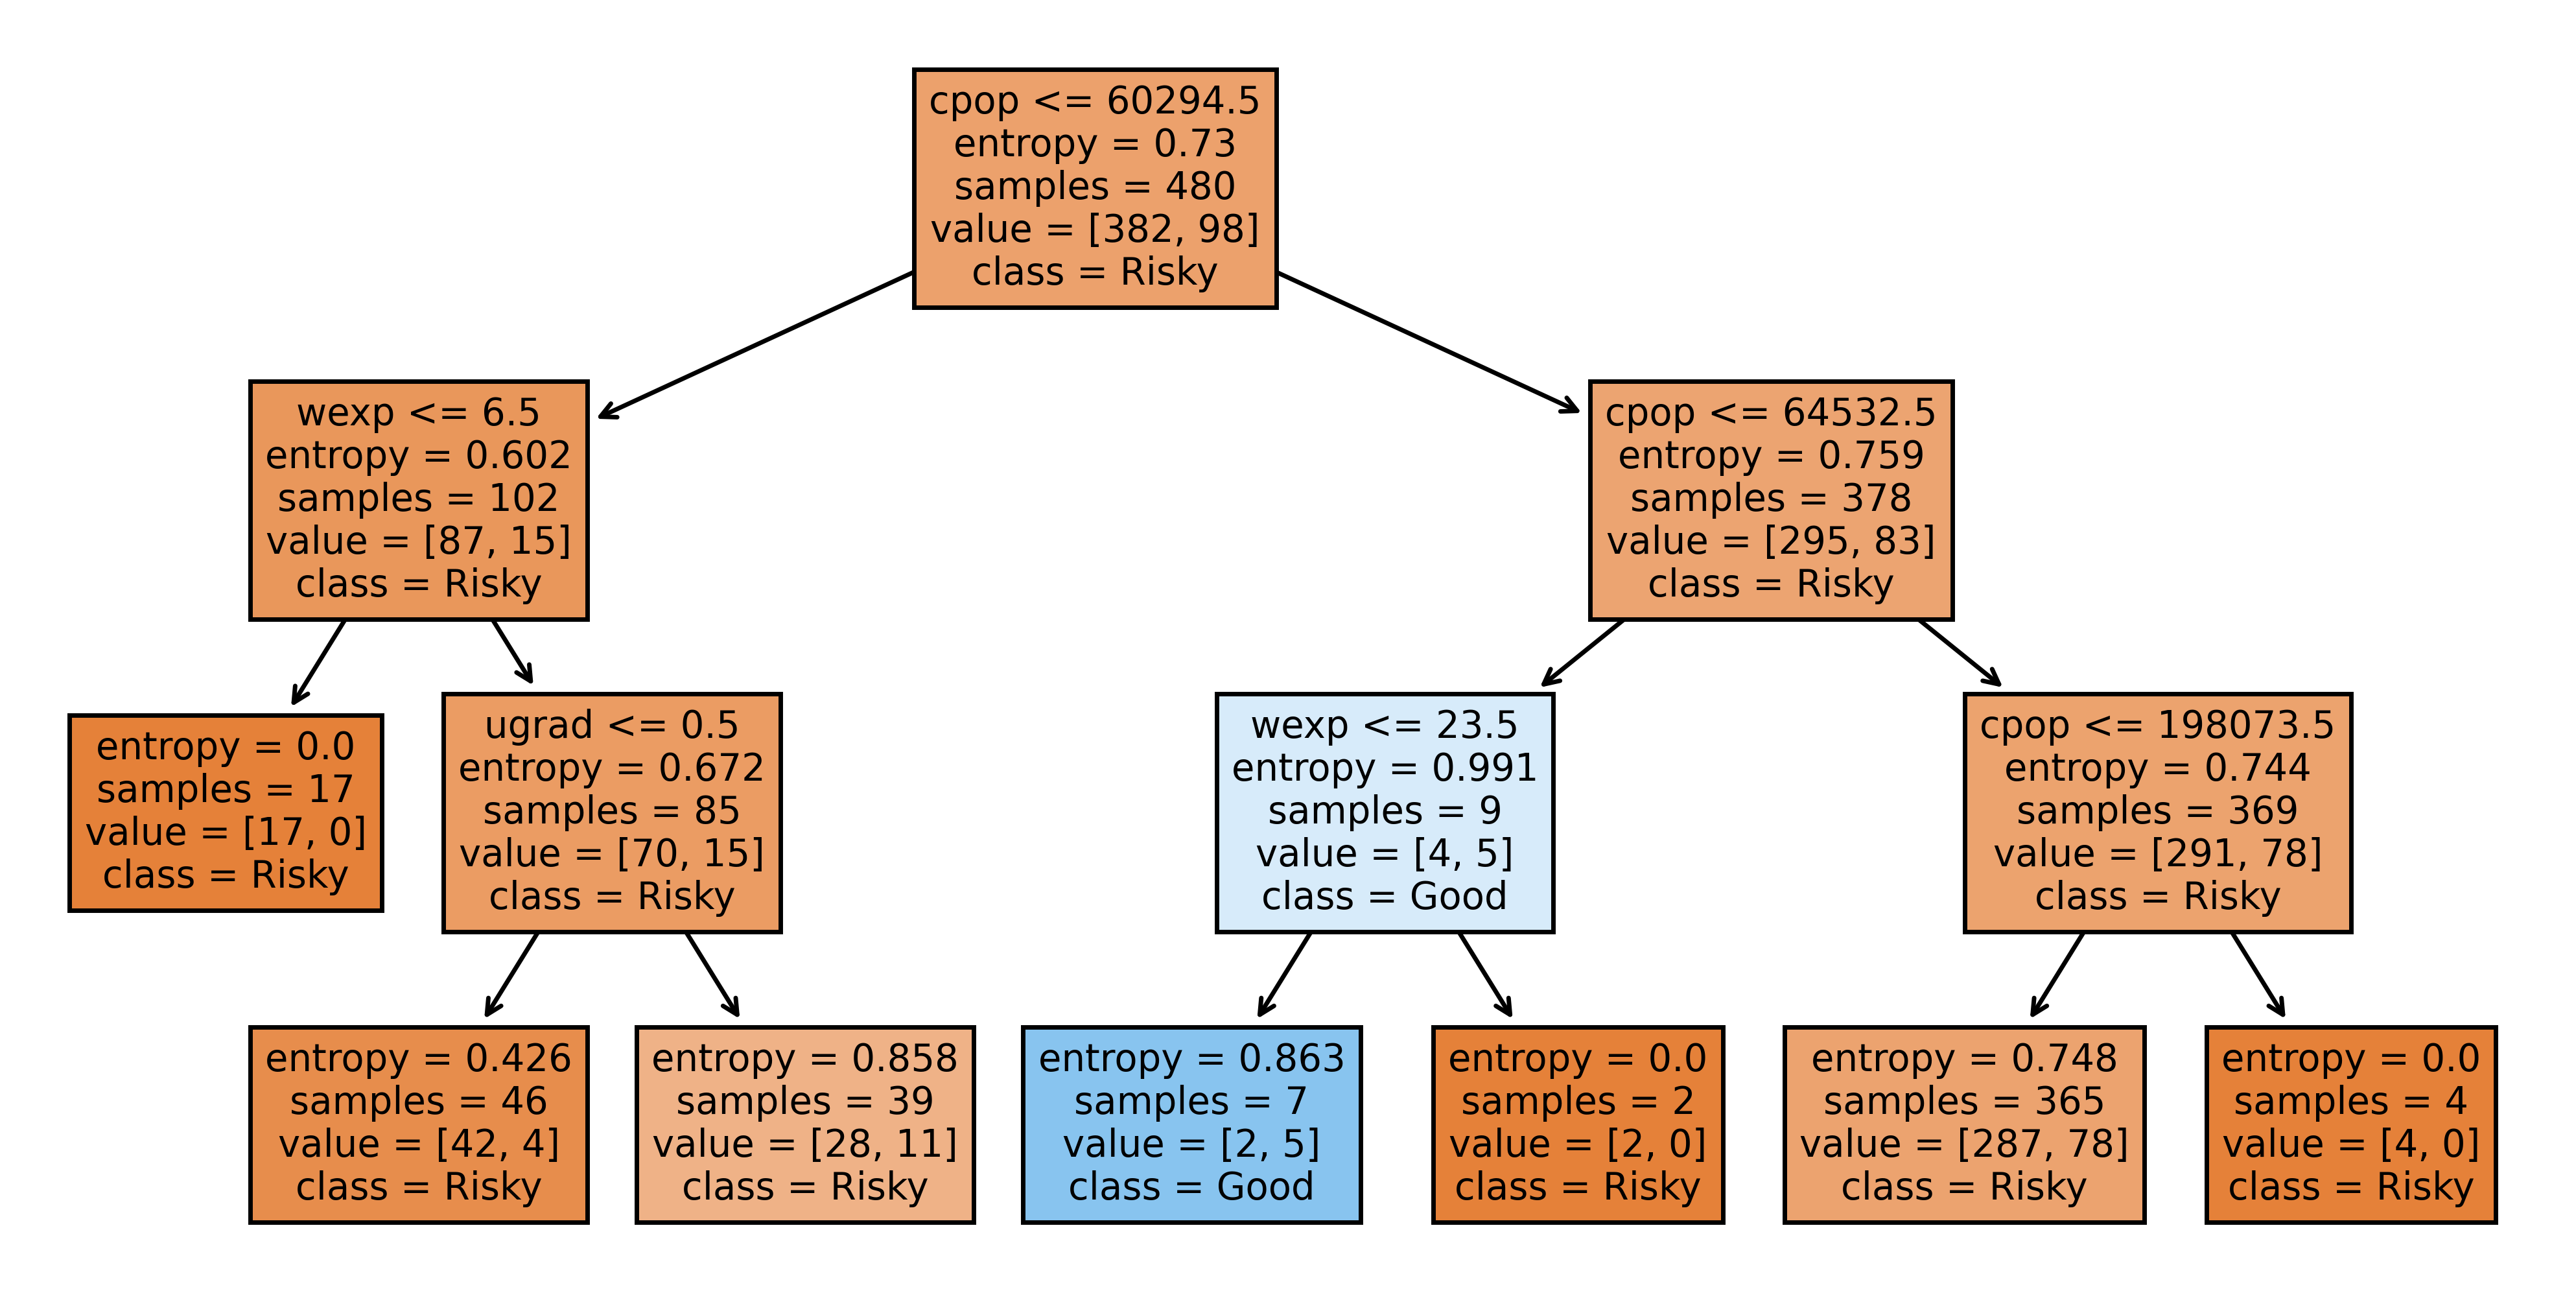

In [128]:
tree.plot_tree(dt , feature_names=['ugrad', 'mstat', 'cpop', 'wexp', 'urban'] , class_names=['Risky' , 'Good'] , filled=True )
plt.show()